##### @author: TengSiong (T.S) Yeap
Lab 1

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#import packages for analysis and modeling
import pandas as pd 
import numpy as np 
from scipy.stats import uniform  
import statsmodels.api as sm
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
#import "coaches" dataset
coaches = pd.read_csv("Coaches.csv")

#print the first five rows of the data frame and show summary
coaches.head()
coaches.describe()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
count,130,130,130,130,130,130,130,130,130
unique,130,11,130,104,105,85,51,1,102
top,Southern Methodist,Big Ten,Pat Narduzzi,"$3,500,000","$3,500,000",--,--,$0,--
freq,1,14,1,5,5,23,42,130,23


In [4]:
#convert column names to lowercase
coaches.columns = coaches.columns.str.lower()

#convert values to string and lowercase
coaches[['school','conference','coach']] = coaches[['school','conference','coach']].astype(str)

#convert values to lowercase
coaches['school']= coaches['school'].str.lower()
coaches['conference']= coaches['conference'].str.lower()
coaches['coach']= coaches['coach'].str.lower()

#convert values to numeric
coaches_num = ['schoolpay','totalpay','bonus','bonuspaid','assistantpay','buyout']

#remove all non-numeric to an empty space
coaches[coaches_num] = coaches[coaches_num].replace('[\$,--]', '', regex=True)

#convert coaches_num to numeric
coaches[coaches_num] = coaches[coaches_num].apply(pd.to_numeric).fillna(0)
coaches.head()
coaches.describe()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\dtypes\inference.py:244: FutureWarning: Possible set difference at position 4
  re.compile(obj)


,school,conference,coach,schoolpay,totalpay,bonus,bonuspaid,assistantpay,buyout
0,air force,mt. west,troy calhoun,885000.0,885000.0,247000.0,0.0,0,0.0
1,akron,mac,terry bowden,411000.0,412500.0,225000.0,50000.0,0,688500.0
2,alabama,sec,nick saban,8307000.0,8307000.0,1100000.0,500000.0,0,33600000.0
3,alabama at birmingham,c-usa,bill clark,900000.0,900000.0,950000.0,165471.0,0,3847500.0
4,appalachian state,sun belt,scott satterfield,712500.0,712500.0,295000.0,145000.0,0,2160417.0


,schoolpay,totalpay,bonus,bonuspaid,assistantpay,buyout
count,1.300000e+02,1.300000e+02,1.300000e+02,1.300000e+02,130.0,1.300000e+02
mean,2.317597e+06,2.324097e+06,7.195159e+05,1.012164e+05,0.0,6.682650e+06
std,1.902341e+06,1.906820e+06,6.657034e+05,2.082616e+05,0.0,9.980033e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
25%,7.250175e+05,7.250175e+05,2.125000e+05,0.000000e+00,0.0,5.180752e+05
50%,1.775000e+06,1.815000e+06,6.050000e+05,2.000000e+04,0.0,2.590104e+06
75%,3.550000e+06,3.550000e+06,1.018750e+06,9.875000e+04,0.0,8.791667e+06
max,8.307000e+06,8.307000e+06,3.100000e+06,1.350000e+06,0.0,6.812500e+07


In [5]:
#import Stadiums data
stadiums = pd.read_csv("stadiums.csv")

#print the first five rows of the data frame and show summary
stadiums.head()
stadiums.describe()

,stadium,city,state,team,conference,capacity,built,expanded,div,latitude,longitude
0,Michigan Stadium,Ann Arbor,MI,Michigan,Big Ten,107601,1927,2015,fbs,42.265869,-83.748726
1,Beaver Stadium,University Park,PA,Penn State,Big Ten,106572,1960,2001,fbs,40.812153,-77.856202
2,Ohio Stadium,Columbus,OH,Ohio State,Big Ten,104944,1922,2014,fbs,40.001686,-83.019728
3,Kyle Field,College Station,TX,Texas A&M,SEC,102733,1927,2015,fbs,30.610098,-96.340729
4,Neyland Stadium,Knoxville,TN,Tennessee,SEC,102455,1921,2010,fbs,35.954734,-83.925333


,capacity,built,latitude,longitude
count,253.000000,253.000000,253.000000,253.000000
mean,33200.466403,1963.454545,37.188850,-89.485439
std,25904.041476,29.540041,4.764327,14.010477
min,2200.000000,1895.000000,21.372783,-157.929969
25%,12283.000000,1934.000000,33.509339,-95.409265
50%,25200.000000,1966.000000,37.354414,-85.952177
75%,50000.000000,1986.000000,40.820484,-79.956432
max,107601.000000,2014.000000,47.911254,-68.673551


In [8]:
#convert column names to lowercase
stadiums.columns = stadiums.columns.str.lower()

#convert values to string and lowercase
stadiums = stadiums.apply(lambda x: x.astype(str).str.lower())

# convert column name: to allow data merge
stadiums = stadiums.rename(columns={'team': 'school','capacity':'stadium_capacity'})

#convert values to numeric
stadiums_num = ['stadium_capacity','built','expanded']

#convert stadiums_num to numeric
stadiums[stadiums_num] = stadiums[stadiums_num].apply(pd.to_numeric, errors='coerce', axis=1).fillna(0)
stadiums.head()
stadiums.describe()

,stadium,city,state,school,conference,stadium_capacity,built,expanded,div,latitude,longitude
0,michigan stadium,ann arbor,mi,michigan,big ten,107601.0,1927.0,2015.0,fbs,42.26586873251738,-83.7487256526947
1,beaver stadium,university park,pa,penn state,big ten,106572.0,1960.0,2001.0,fbs,40.81215273275043,-77.85620212554932
2,ohio stadium,columbus,oh,ohio state,big ten,104944.0,1922.0,2014.0,fbs,40.001685689369396,-83.01972806453705
3,kyle field,college station,tx,texas a&m,sec,102733.0,1927.0,2015.0,fbs,30.610097578174763,-96.34072922859283
4,neyland stadium,knoxville,tn,tennessee,sec,102455.0,1921.0,2010.0,fbs,35.954734372622575,-83.9253330230713


,stadium_capacity,built,expanded
count,253.000000,253.000000,2.530000e+02
mean,33200.466403,1963.454545,8.041287e+04
std,25904.041476,29.540041,1.261218e+06
min,2200.000000,1895.000000,0.000000e+00
25%,12283.000000,1934.000000,0.000000e+00
50%,25200.000000,1966.000000,1.992000e+03
75%,50000.000000,1986.000000,2.006000e+03
max,107601.000000,2014.000000,2.006201e+07


In [9]:
#import Graduation data
grad = pd.read_csv("graduation.csv")

#print the first five rows of the data frame and show summary
grad.head()
grad.describe()

,school,gsr,fgr
0,Air Force,93.0,NaN
1,Akron,58.0,52.0
2,Alabama,73.0,57.0
3,Alabama at Birmingham,60.0,55.0
4,Appalachian State,68.0,56.0


,gsr,fgr
count,126.000000,122.000000
mean,69.261905,57.368852
std,11.304639,10.243483
min,44.000000,37.000000
25%,61.000000,52.000000
50%,68.000000,57.000000
75%,75.750000,62.750000
max,96.000000,89.000000


In [10]:
#convert values to string and lowercase
grad = grad.apply(lambda x: x.astype(str).str.lower())

#convert values to numeric
grad_num = ['gsr','fgr']

#convert grad_num to numeric
grad[grad_num] = grad[grad_num].apply(pd.to_numeric, errors='coerce', axis=1).fillna(0)
grad.head()
grad.describe()

,school,gsr,fgr
0,air force,93.0,0.0
1,akron,58.0,52.0
2,alabama,73.0,57.0
3,alabama at birmingham,60.0,55.0
4,appalachian state,68.0,56.0


,gsr,fgr
count,130.000000,130.000000
mean,67.130769,53.838462
std,16.370889,17.028387
min,0.000000,0.000000
25%,60.000000,49.000000
50%,67.500000,57.000000
75%,75.000000,62.000000
max,96.000000,89.000000


In [11]:
#import past season data
season = pd.read_csv("season2017.csv")

#print the first five rows of the data frame and show summary
season.head()
season.describe()

,school,win,loss,pct
0,Air Force,5,7,0.416667
1,Akron,7,7,0.500000
2,Alabama,13,1,0.928571
3,Alabama at Birmingham,4,7,0.363636
4,Appalachian State,9,4,0.692308


,win,loss,pct
count,130.000000,130.000000,130.000000
mean,6.584615,5.961538,0.515831
std,3.082294,2.549977,0.220238
min,0.000000,0.000000,0.000000
25%,4.000000,4.000000,0.363636
50%,7.000000,6.000000,0.538462
75%,9.000000,7.000000,0.692308
max,13.000000,12.000000,1.000000


In [12]:
#convert values to string and lowercase
season = season.apply(lambda x: x.astype(str).str.lower())

#convert values to numeric
season_num = ['win','loss','pct']

#convert season_num to numeric
season[season_num] = season[season_num].apply(pd.to_numeric, errors='coerce', axis=1).fillna(0)
season.head()
season.describe()

,school,win,loss,pct
0,air force,5.0,7.0,0.416667
1,akron,7.0,7.0,0.500000
2,alabama,13.0,1.0,0.928571
3,alabama at birmingham,4.0,7.0,0.363636
4,appalachian state,9.0,4.0,0.692308


,win,loss,pct
count,130.000000,130.000000,130.000000
mean,6.584615,5.961538,0.515831
std,3.082294,2.549977,0.220238
min,0.000000,0.000000,0.000000
25%,4.000000,4.000000,0.363636
50%,7.000000,6.000000,0.538462
75%,9.000000,7.000000,0.692308
max,13.000000,12.000000,1.000000


In [13]:
#For the purpose of this analysis, I decide to narrow down the scope and choose the variables that I'm interested
coaches = coaches[['school','conference','totalpay','bonus']]
stadiums = stadiums[['school','stadium_capacity']]

In [14]:
#To merge all the datasets as one data frame, I need to rename the school names so the keys will match when they merge
#Replace acronym with school name.
stadiums['school'] = stadiums['school'].replace(['ucf'], 'central florida')
stadiums['school'] = stadiums['school'].replace(['usf'], 'south florida')
stadiums['school'] = stadiums['school'].replace(['utsa'], 'texas-san antonio')
stadiums['school'] = stadiums['school'].replace(['byu'], 'brigham young')
stadiums['school'] = stadiums['school'].replace(['utep'], 'texas-el paso')
stadiums['school'] = stadiums['school'].replace(['tcu'], 'texas christian')
stadiums['school'] = stadiums['school'].replace(['unlv'], 'nevada-las vegas')
stadiums['school'] = stadiums['school'].replace(['smu'], 'southern methodist')
stadiums['school'] = stadiums['school'].replace(['niu'], 'northern illinois')
stadiums['school'] = stadiums['school'].replace(['miami (oh)'], 'miami (ohio)')
stadiums['school'] = stadiums['school'].replace(['fiu'], 'florida international')
stadiums['school'] = stadiums['school'].replace(['umass'], 'massachusetts')

In [26]:
#merged all datasets into one dataframe
merge = coaches.merge(stadiums, on = 'school').merge(grad, on = 'school').merge(season, on = 'school')
merge.head()
merge.describe()

,school,conference,totalpay,bonus,stadium_capacity,gsr,fgr,win,loss,pct
0,air force,mt. west,885000.0,247000.0,46692.0,93.0,0.0,5.0,7.0,0.416667
1,akron,mac,412500.0,225000.0,30000.0,58.0,52.0,7.0,7.0,0.500000
2,alabama,sec,8307000.0,1100000.0,101821.0,73.0,57.0,13.0,1.0,0.928571
3,appalachian state,sun belt,712500.0,295000.0,24050.0,68.0,56.0,9.0,4.0,0.692308
4,arizona,pac-12,2000000.0,2025000.0,51811.0,61.0,59.0,5.0,4.0,0.555556


,totalpay,bonus,stadium_capacity,gsr,fgr,win,loss,pct
count,1.230000e+02,1.230000e+02,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,2.372579e+06,7.264802e+05,51790.764228,67.024390,53.544715,6.609756,5.959350,0.516846
std,1.922699e+06,6.737894e+05,23413.315833,16.723138,17.426780,3.101121,2.568403,0.221514
min,0.000000e+00,0.000000e+00,15314.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.812850e+05,2.200000e+05,30982.000000,59.000000,49.000000,4.500000,4.000000,0.390152
50%,1.831580e+06,5.850000e+05,49250.000000,68.000000,57.000000,7.000000,6.000000,0.538462
75%,3.583750e+06,1.037500e+06,65428.500000,75.500000,62.000000,9.000000,7.000000,0.692308
max,8.307000e+06,3.100000e+06,107601.000000,96.000000,89.000000,13.000000,12.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


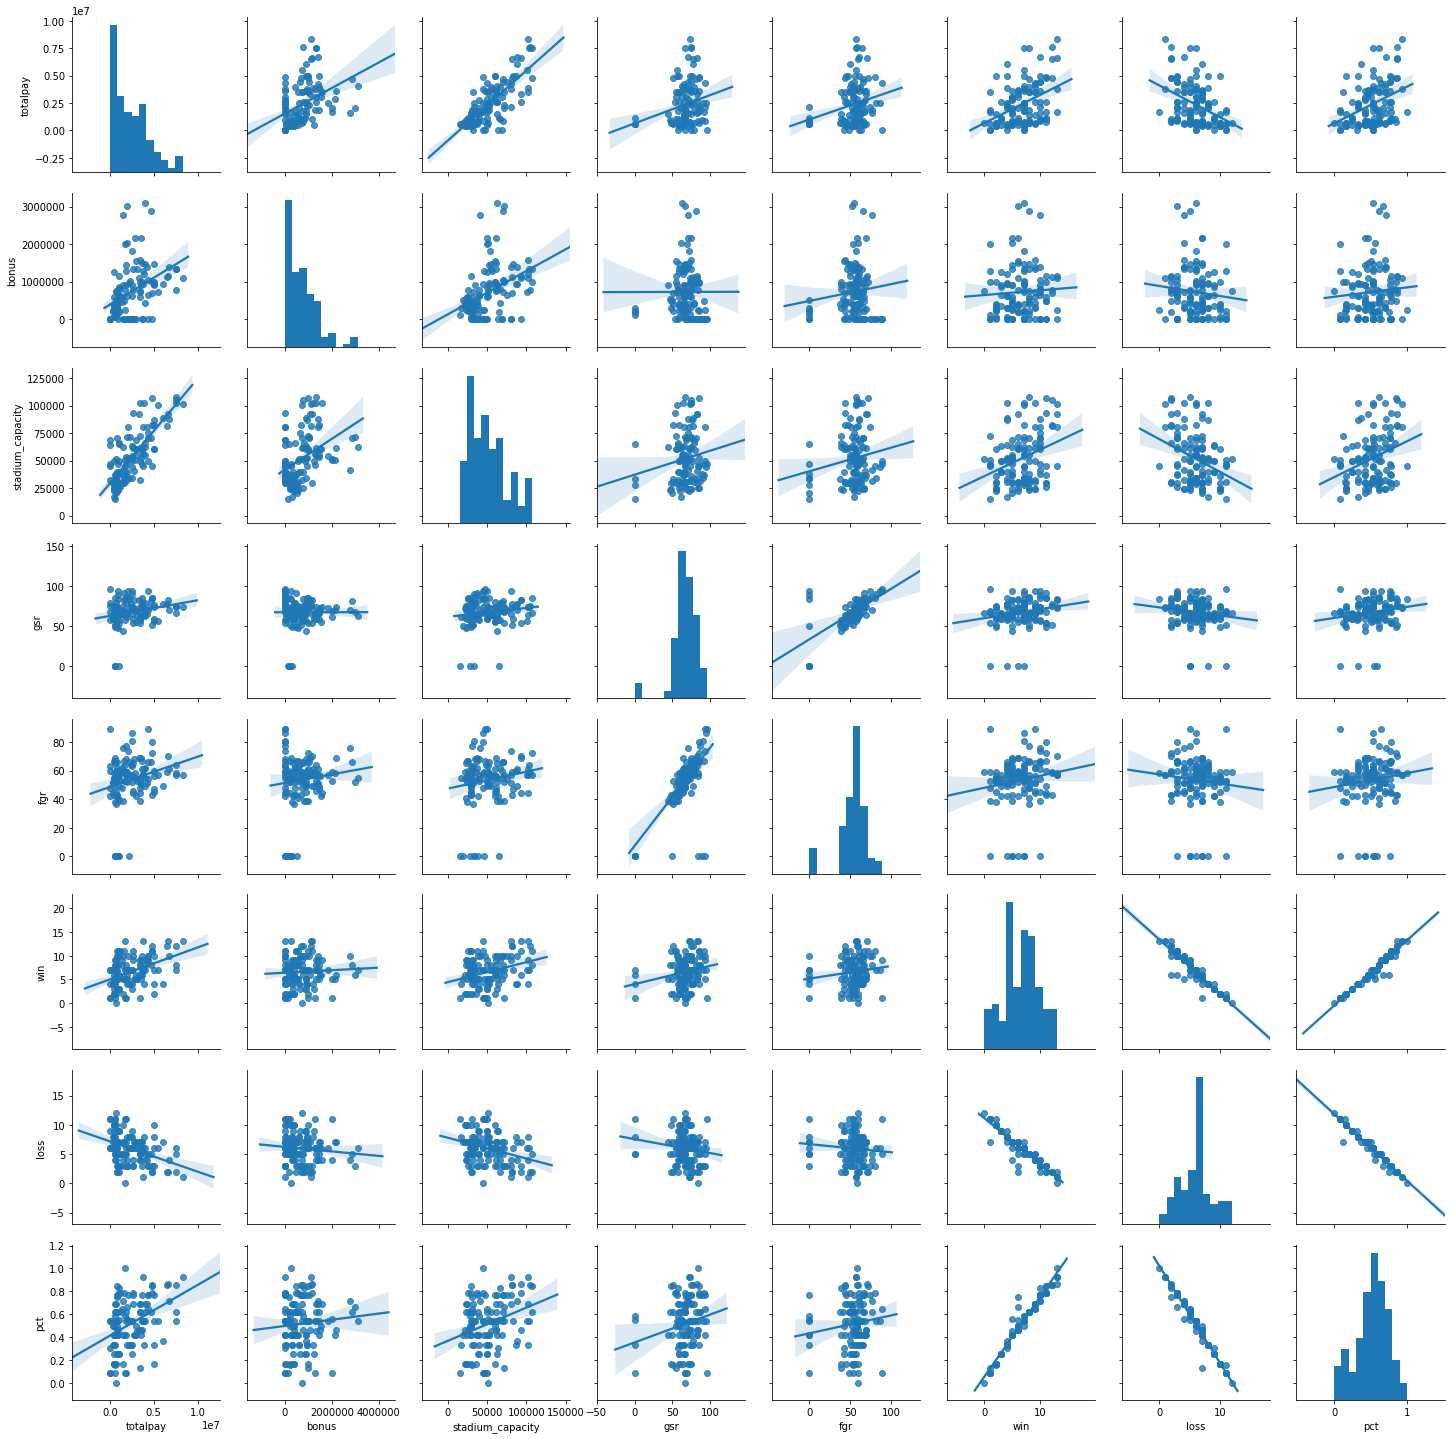

In [35]:
#plot a correlation matrix
sns.pairplot(merge, kind="reg")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([37., 19., 15., 14., 17.,  8.,  5.,  3.,  1.,  4.]),
 array([      0.,  830700., 1661400., 2492100., 3322800., 4153500.,
        4984200., 5814900., 6645600., 7476300., 8307000.]),
 <a list of 10 Patch objects>)

Text(0.5,1,'Total Pay of the Coaches')

Text(0.5,0,'Total Pay($)')

Text(0,0.5,'Frequency')

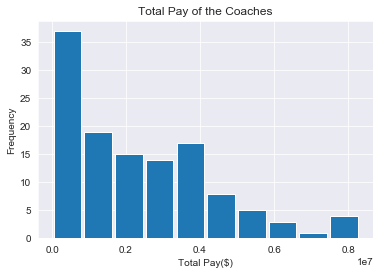

In [44]:
#plot totalpay in histogram
plt.hist(merge['totalpay'], normed = False, stacked = False, rwidth = .9)
plt.title("Total Pay of the Coaches")
plt.xlabel('Total Pay($)')
plt.ylabel('Frequency')

plt.show()

Text(0.5,0,'Conference')

Text(0,0.5,'Total Pay($)')

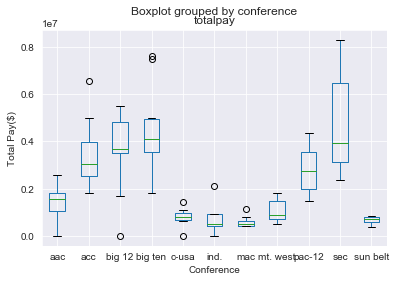

In [54]:
#plot boxplot of totalpay by conference
pay_plt = merge.boxplot('totalpay', by='conference',sym='o', vert=1, whis=1.5)
pay_plt.set_xlabel("Conference")
pay_plt.set_ylabel("Total Pay($)")

In [55]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
merge['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(merge))
merge_train = merge[merge['runiform'] >= 0.33]
merge_test = merge[merge['runiform'] < 0.33]

# check training data frame
print('\nmerge_train data frame (rows, columns): ',merge_train.shape)
print(merge_train.head())

# check test data frame
print('\nmerge_test data frame (rows, columns): ',merge_test.shape)
print(merge_test.head())


merge_train data frame (rows, columns):  (89, 11)
              school conference   totalpay      bonus  stadium_capacity   gsr  \
1              akron        mac   412500.0   225000.0           30000.0  58.0   
2            alabama        sec  8307000.0  1100000.0          101821.0  73.0   
3  appalachian state   sun belt   712500.0   295000.0           24050.0  68.0   
4            arizona     pac-12  2000000.0  2025000.0           51811.0  61.0   
7     arkansas state   sun belt   825000.0   185000.0           30964.0  68.0   

    fgr   win  loss       pct  runiform  
1  52.0   7.0   7.0  0.500000  0.622109  
2  57.0  13.0   1.0  0.928571  0.437728  
3  56.0   9.0   4.0  0.692308  0.785359  
4  59.0   5.0   4.0  0.555556  0.779976  
7  60.0   6.0   2.0  0.750000  0.801872  

merge_test data frame (rows, columns):  (34, 11)
           school conference   totalpay      bonus  stadium_capacity   gsr  \
0       air force   mt. west   885000.0   247000.0           46692.0  93.0   
5   

In [58]:
#Model 1
# specify a simple model with all the variables
model1 = str('totalpay ~ bonus + stadium_capacity + gsr + fgr + win + loss + pct')

# fit the model to the training set
train_model_fit = smf.ols(model1, data = merge_train).fit()

# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               totalpay   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     28.14
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           3.09e-19
Time:                        19:36:57   Log-Likelihood:                -1361.4
No. Observations:                  89   AIC:                             2739.
Df Residuals:                      81   BIC:                             2759.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.403e+06    6.4e+06  

In [59]:
#Model 1: Adjusted R-squared is OK. Try another model using the p-value which has <0.05

#Model 2
# specify a simple model with all the variables
model2 = str('totalpay ~ stadium_capacity + win')

# fit the model to the training set
train_model_fit = smf.ols(model2, data = merge_train).fit()

# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               totalpay   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     80.25
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           2.16e-20
Time:                        19:42:33   Log-Likelihood:                -1369.4
No. Observations:                  89   AIC:                             2745.
Df Residuals:                      86   BIC:                             2752.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.422e+06    3.5e+05  

In [70]:
#Model 2: Adjusted R squared decreases. Try adding 'conference' into Model 1

#Model 3
# specify a simple model with all the variables
model3 = str('totalpay ~ conference + bonus + stadium_capacity + gsr + fgr + win + loss + pct')

# fit the model to the training set
train_model_fit = smf.ols(model3, data = merge_train).fit()

# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               totalpay   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     17.50
Date:                Sun, 03 Feb 2019   Prob (F-statistic):           6.00e-19
Time:                        20:10:02   Log-Likelihood:                -1343.0
No. Observations:                  89   AIC:                             2722.
Df Residuals:                      71   BIC:                             2767.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.86

In [66]:
#Model 3: Adjusted R squared improved. Let's use model 3 as THE model
#
#Questions
#
# What is the recommended salary for the Syracuse football coach?
target = merge[merge['school'] == 'syracuse']
train_model_fit.predict(target[['conference', 'bonus', 'stadium_capacity', 'gsr', 'fgr', 'win', 'loss', 'pct']])

95    2.569177e+06
dtype: float64

##### What would his salary be if we were still in the Big East? What if we went to the Big Ten?
##### Answer:
The Big East does not include football. I assume it's a typo. If the Syracuse football coach went to the Big Ten...
...
His salary will increase another 2.062e+06 in addition to the predicted value above (2.569177e+06). The increment value 
is obtained from the coeefficient value from the model above. 


##### What schools did we drop from our data, and why?
##### Answer:
Alabama at Birmingham, Coastal Carolina, Liberty, Miami (Fla.), Nevada, North Carolina State and Southern Mississippi because there schools are not found in the 'stadium' dataset.

##### What effect does graduation rate have on the projected salary?
##### Answer:
The graduation rate will have a negative relation with the projected salary. For a unit for increment in graduation rate, there will be a decrease of $8631 in salary. This does not make sense as from the correlation maxtrix above, we see that total pay and graduation rate are positively correlated. 

##### How good is our model?
##### Answer
My model has an adjusted R squared of 76%. 

##### What is the single biggest impact on salary size?
##### Answer:
Based on the p-value on all the variables, it seems like stadium capacity plays a big role in determining salary size. 